In [1]:
#First I need to import everything
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [2]:
#Now I need to create the dataframe for the dataset.
df = pd.read_csv('Hotel Reservations.csv', index_col=0)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
Booking_ID,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
#Now to clean the data, first check to see if there's any NaN values
#df.isna()
#There are none, now looking at the dataset I need to see which columns
    #have non-numeric values
#df.info()
#df.select_dtypes("object").nunique().sort_values()
#The columns that need adjusting are, those being type_of_meal_plan,
    #room_type_reserved, market_segment_type, and booking_status
#Now time to make a dummy frame
dummy_frame = pd.get_dummies(df, drop_first=False, dtype="int64")

#dummy_frame.info()

#dummy_frame.head()

#Because booking_status_Canceled and booking_status_Not_Canceled
    #tell the same information I will drop booking_status_Not_Canceled
dummy_frame.drop('booking_status_Not_Canceled', axis=1, inplace=True)

In [4]:
#Now to make X and y
y = dummy_frame['booking_status_Canceled']
X = dummy_frame.drop('booking_status_Canceled', axis=1)
print(y.head())
X.head()

Booking_ID
INN00001    0
INN00002    0
INN00003    1
INN00004    1
INN00005    1
Name: booking_status_Canceled, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
Booking_ID,,,,,,,,,,,,,,,,,,,,,
INN00001,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
INN00002,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
INN00003,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
INN00004,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
INN00005,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
#Now to make the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                   train_size=0.75, 
                                                   random_state=42)

In [6]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
#random_forest.score(X_train, y_train)
random_forest.score(X_test, y_test)
#With this first try the model is far too overfitted

0.9056125261881134

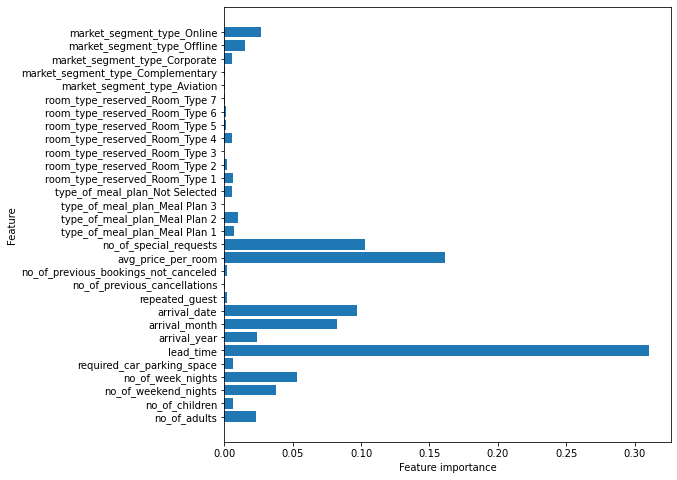

In [8]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

plot_feature_importances(random_forest)

In [9]:
bag_forest = BaggingClassifier(random_state=42)
bag_forest.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [10]:
bag_forest.score(X_train, y_train)
bag_forest.score(X_test, y_test)
#Now to do confusion matrices for both

0.893703826221193

In [11]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [12]:
#Confusion Matrix for both the random forest and bagging classifier, first to
    #the y-hat for both classifiers
rf_test = random_forest.predict(X_test)
bag_test = bag_forest.predict(X_test)

In [13]:
rf_cnf = confusion_matrix(y_test, rf_test)
print("This is the random forest confusion matrix ", rf_cnf)
bag_cnf = confusion_matrix(y_test, bag_test)
print("This is the bagging classifier confusion matrix", bag_cnf)

This is the random forest confusion matrix  [[5750  293]
 [ 563 2463]]
This is the bagging classifier confusion matrix [[5675  368]
 [ 596 2430]]


In [14]:
#Before I tune the hyper parameters, I want to remove any values that are
    #making little impact. If they have a z-score less than -3 I'll get rid of them
feat_imports = random_forest.feature_importances_
#print(feat_imports)

feat_mean = feat_imports.mean()
#print(feat_mean)
feat_std = feat_imports.std()
#print(feat_std)
index_counter = 0
index_list = []
for x in feat_imports:
    #print((x-feat_mean)/feat_std)
    if (x-feat_mean) < 0:
        index_list.append(index_counter)
    index_counter+=1
print(index_list)

[0, 1, 4, 6, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [15]:
X_important = X.drop(X.columns[index_list], axis=1)
print(X_important)


            no_of_weekend_nights  no_of_week_nights  lead_time  arrival_month  \
Booking_ID                                                                      
INN00001                       1                  2        224             10   
INN00002                       2                  3          5             11   
INN00003                       2                  1          1              2   
INN00004                       0                  2        211              5   
INN00005                       1                  1         48              4   
...                          ...                ...        ...            ...   
INN36271                       2                  6         85              8   
INN36272                       1                  3        228             10   
INN36273                       2                  6        148              7   
INN36274                       0                  3         63              4   
INN36275                    

In [16]:
#New training based on this idea
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_important, y, 
                                                            test_size=0.25, 
                                                            train_size=0.75, 
                                                            random_state=42)

In [17]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_i, y_train_i)

RandomForestClassifier(random_state=42)

In [18]:
random_forest.score(X_train_i, y_train_i)
random_forest.score(X_test_i, y_test_i)
#It seems the changes made didn't actually help the set

0.8895137280846841

<AxesSubplot:xlabel='lead_time', ylabel='booking_status_Canceled'>

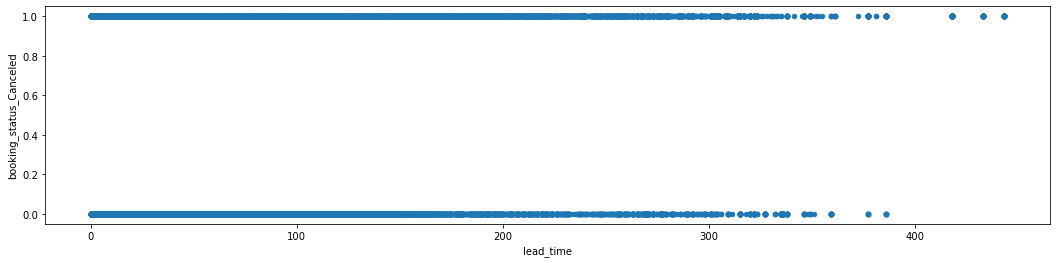

In [19]:
#Let's plot a scatter plot to observe how the lead_time affects booking
dummy_frame.plot(kind = 'scatter', x='lead_time', y='booking_status_Canceled', 
                figsize=(18,4))
#So it turns out that the lead time and the booking status are actually not
    #that closely linked

In [20]:
#Now for the tuning of the hyper parameters instead
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [21]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [22]:
#from sklearn.pipeline import Pipeline

In [23]:
#Lets start changing up a bunch of these
para_grid = [{
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [6, 8, 10, 12],
    'max_depth': [22, 24, 26],
    'max_features': ['sqrt', 'log2'],
}]
grid_rf = GridSearchCV(estimator=random_forest, param_grid=para_grid, cv=3)

In [123]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [22, 24, 26],
                          'max_features': ['sqrt', 'log2'],
                          'min_samples_split': [6, 8, 10, 12]}])

In [124]:
grid_rf.score(X_train, y_train)
grid_rf.score(X_test, y_test)
#No matter how I change the parameters I am unable to beat the base Random Forest

0.9008710993494321